In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
from scipy.integrate import odeint
import lmfit
from tqdm.auto import tqdm

In [2]:
from scipy.stats.stats import pearsonr 

In [3]:
matplotlib.rcParams['figure.figsize'] = (10, 7)

In [4]:
sns.set()
%matplotlib inline

In [5]:
%load_ext autoreload

In [6]:
%autoreload 2

# Load data

In [7]:
DATASET_PATH = '/media/boris/ubuntu_data/datasets/covid-19-data/public/data/owid-covid-data.csv'
EXCESS_MORTALITY = '/media/boris/ubuntu_data/datasets/covid-19-data/public/data/excess_mortality/excess_mortality.csv'

In [8]:
df = pd.read_csv(DATASET_PATH)

In [9]:
useless_columns = ['iso_code', 'continent',
       'new_vaccinations_smoothed', 'total_vaccinations_per_hundred',
       'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred',
       'new_vaccinations_smoothed_per_million', 'stringency_index',
       'population_density', 'median_age', 'aged_65_older',
       'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
       'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand',
       'life_expectancy', 'human_development_index', 'total_cases_per_million', 'new_cases_per_million',
       'new_cases_smoothed_per_million', 'total_deaths_per_million',
       'new_deaths_per_million', 'new_deaths_smoothed_per_million', 'icu_patients_per_million', 'hosp_patients_per_million', 'weekly_icu_admissions_per_million',
        'weekly_hosp_admissions_per_million', 'total_tests_per_thousand',  'new_tests_per_thousand', 'new_tests_smoothed_per_thousand', 'icu_patients', 'hosp_patients',
       'weekly_icu_admissions', 'weekly_hosp_admissions',
                   'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations',
                  ]
df = df.drop(columns=useless_columns)

In [10]:
df.date = pd.to_datetime(df.date)

In [11]:
df.head().T

0                    1  \
location                     Afghanistan          Afghanistan   
date                 2020-02-24 00:00:00  2020-02-25 00:00:00   
total_cases                          1.0                  1.0   
new_cases                            1.0                  0.0   
new_cases_smoothed                   NaN                  NaN   
total_deaths                         NaN                  NaN   
new_deaths                           NaN                  NaN   
new_deaths_smoothed                  NaN                  NaN   
reproduction_rate                    NaN                  NaN   
new_tests                            NaN                  NaN   
total_tests                          NaN                  NaN   
new_tests_smoothed                   NaN                  NaN   
positive_rate                        NaN                  NaN   
tests_per_case                       NaN                  NaN   
tests_units                          NaN                  NaN   
population                    38928341.0           38928341.0   

                                       2                    3  \
location                     Afghanistan          Afghanistan   
date                 2020-02-26 00:00:00  2020-02-27 00:00:00   
total_cases                          1.0                  1.0   
new_cases                            0.0                  0.0   
new_cases_smoothed                   NaN                  NaN   
total_deaths                         NaN                  NaN   
new_deaths                           NaN                  NaN   
new_deaths_smoothed                  NaN                  NaN   
reproduction_rate                    NaN                  NaN   
new_tests                            NaN                  NaN   
total_tests                          NaN                  NaN   
new_tests_smoothed                   NaN                  NaN   
positive_rate                        NaN                  NaN   
tests_per_case                       NaN                  NaN   
tests_units                          NaN                  NaN   
population                    38928341.0           38928341.0   

                                       4  
location                     Afghanistan  
date                 2020-02-28 00:00:00  
total_cases                          1.0  
new_cases                            0.0  
new_cases_smoothed                   NaN  
total_deaths                         NaN  
new_deaths                           NaN  
new_deaths_smoothed                  NaN  
reproduction_rate                    NaN  
new_tests                            NaN  
total_tests                          NaN  
new_tests_smoothed                   NaN  
positive_rate                        NaN  
tests_per_case                       NaN  
tests_units                          NaN  
population                    38928341.0

In [12]:
mort_df = pd.read_csv(EXCESS_MORTALITY)
mort_df['date'] = pd.to_datetime(mort_df.date)
mort_df = mort_df[['location', 'date', 'p_scores_all_ages', 'time_unit']]
mort_df.head(2).T

0                    1
location                       Armenia              Armenia
date               2020-01-31 00:00:00  2020-02-29 00:00:00
p_scores_all_ages                -5.89                 2.26
time_unit                      monthly              monthly

# Rt

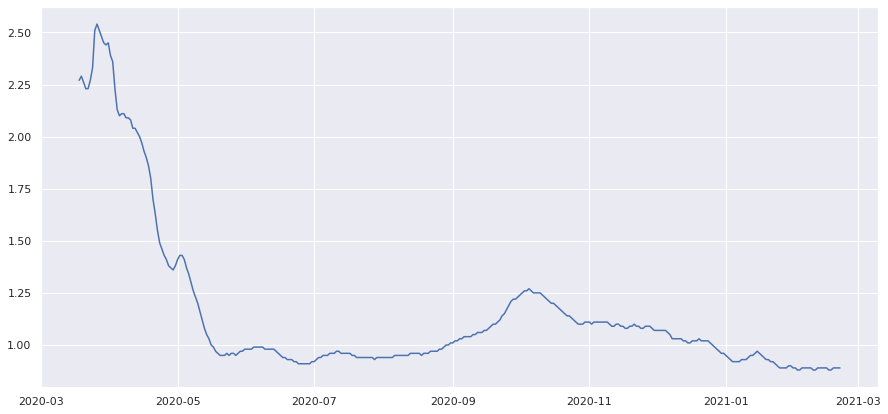

In [19]:
plt.figure(figsize=(15, 7))
plt.plot(df[df.location == 'Russia'].date, df[df.location == 'Russia'].reproduction_rate)
plt.show()

In [ ]:
# Relatively flat areas:
#2020-06 - 2020-09
#2020-11 - 2021-03

# Excess mortality vs cases reported

In [438]:
def plot_col_against_excess_mortality(col, loc):
    tdf = df[df.location == loc]
    tdf.index = tdf.date
    tdf = tdf[[col, 'date']].dropna()
    tdf_mortality = mort_df[mort_df.location == loc].dropna()
    tdf_mortality.index = tdf_mortality.date

    intersect_dates = sorted(set(tdf_mortality.date).intersection(set(tdf.date)))
    col_val = tdf[col].loc[intersect_dates]
    p_scores = tdf_mortality.loc[intersect_dates].p_scores_all_ages
    print('Correlation', pearsonr(col_val, p_scores))
    plt.title(f'{col} vs excess mortality in {loc}')
    plt.plot(col_val, p_scores)
    plt.xlabel(col)
    plt.ylabel('p_scores')
    plt.show()

Correlation (0.958018122178848, 1.2917443463213842e-05)


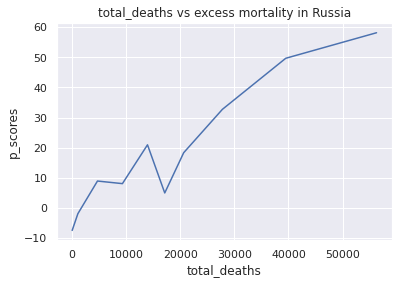

In [439]:
plot_col_against_excess_mortality('total_deaths', 'Russia')

Correlation (0.9717513865225957, 1.3510720435353683e-07)


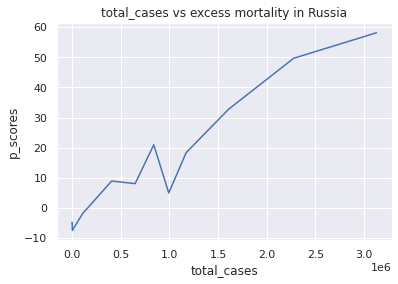

Correlation (0.49979715749580506, 0.0002195094585215334)


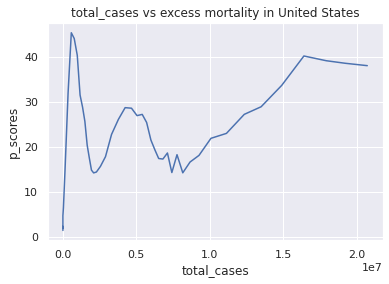

Correlation (0.7270183351771605, 4.814896744411234e-10)


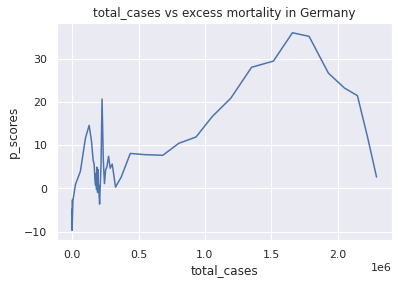

In [440]:
plot_col_against_excess_mortality('total_cases', 'Russia')
plot_col_against_excess_mortality('total_cases', 'United States')
plot_col_against_excess_mortality('total_cases', 'Germany')

In [449]:
countries = []
corrs_total_cases = []
corrs_total_deaths = []

for loc in df.location.unique():
    tdf = df[df.location == loc]
    tdf.index = tdf.date
    tdf = tdf[['date', 'total_cases', 'total_deaths']].dropna()
    tdf_mortality = mort_df[mort_df.location == loc].dropna()
    tdf_mortality.index = tdf_mortality.date

    intersect_dates = sorted(set(tdf_mortality.date).intersection(set(tdf.date)))
    total_cases = tdf['total_cases'].loc[intersect_dates]
    total_deaths = tdf['total_deaths'].loc[intersect_dates]
    p_scores = tdf_mortality.loc[intersect_dates].p_scores_all_ages
    
    if total_cases.empty or total_deaths.empty or p_scores.empty:
        continue
        
    countries.append(loc)
    corrs_total_cases.append(pearsonr(total_cases, p_scores)[0])
    corrs_total_deaths.append(pearsonr(total_deaths, p_scores)[0])

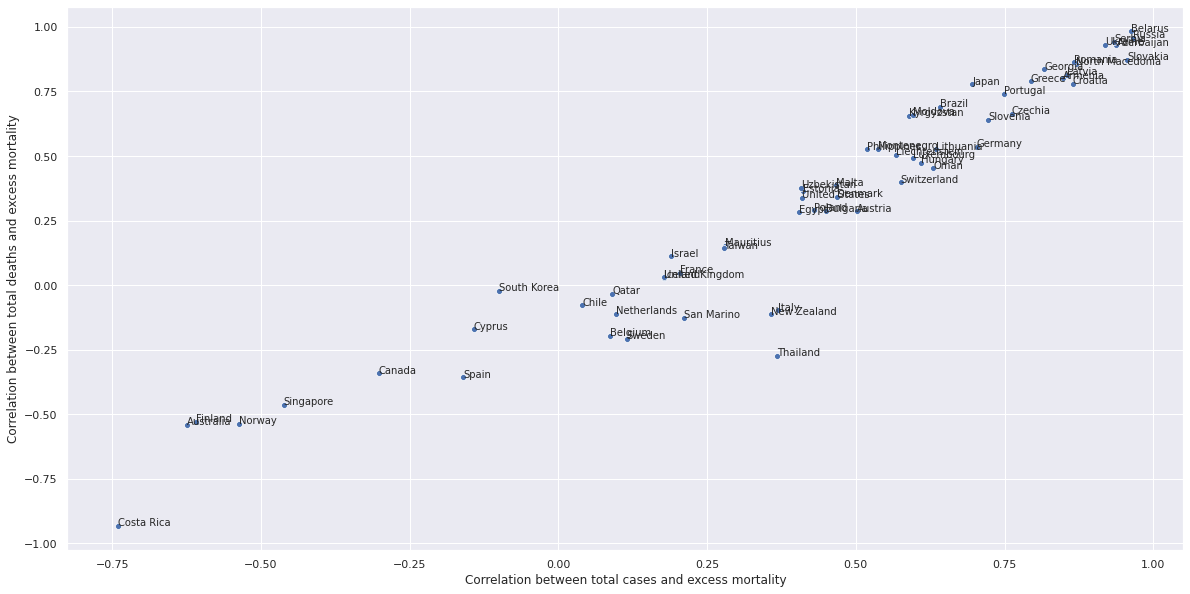

In [453]:
plt.figure(figsize=(20, 10))
sns.scatterplot(corrs_total_cases, corrs_total_deaths)

for i, txt in enumerate(countries):
    plt.annotate(txt, (corrs_total_cases[i], corrs_total_deaths[i]))
plt.xlabel("Correlation between total cases and excess mortality")
plt.ylabel("Correlation between total deaths and excess mortality")
plt.show()

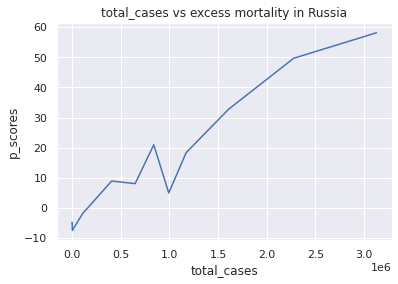

In [445]:
col = 'total_cases'
loc = 'Russia'
tdf = df[df.location == loc]
tdf.index = tdf.date
tdf_mortality = mort_df[mort_df.location == loc]

total_cases = tdf[col].loc[tdf_mortality.date]
p_scores = tdf_mortality.p_scores_all_ages

plt.title(f'{col} vs excess mortality in {loc}')
plt.plot(total_cases, p_scores)
plt.xlabel(col)
plt.ylabel('p_scores')
plt.show()

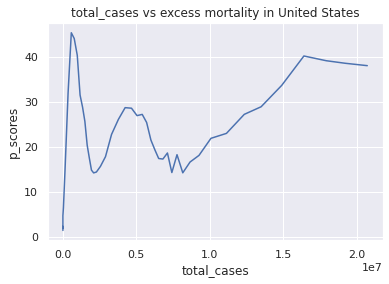

In [375]:
intersect_dates

[Timestamp('2020-01-26 00:00:00'),
 Timestamp('2020-02-02 00:00:00'),
 Timestamp('2020-02-09 00:00:00'),
 Timestamp('2020-02-16 00:00:00'),
 Timestamp('2020-02-23 00:00:00'),
 Timestamp('2020-03-01 00:00:00'),
 Timestamp('2020-03-08 00:00:00'),
 Timestamp('2020-03-15 00:00:00'),
 Timestamp('2020-03-22 00:00:00'),
 Timestamp('2020-03-29 00:00:00'),
 Timestamp('2020-04-05 00:00:00'),
 Timestamp('2020-04-12 00:00:00'),
 Timestamp('2020-04-19 00:00:00'),
 Timestamp('2020-04-26 00:00:00'),
 Timestamp('2020-05-03 00:00:00'),
 Timestamp('2020-05-10 00:00:00'),
 Timestamp('2020-05-17 00:00:00'),
 Timestamp('2020-05-24 00:00:00'),
 Timestamp('2020-05-31 00:00:00'),
 Timestamp('2020-06-07 00:00:00'),
 Timestamp('2020-06-14 00:00:00'),
 Timestamp('2020-06-21 00:00:00'),
 Timestamp('2020-06-28 00:00:00'),
 Timestamp('2020-07-05 00:00:00'),
 Timestamp('2020-07-12 00:00:00'),
 Timestamp('2020-07-19 00:00:00'),
 Timestamp('2020-07-26 00:00:00'),
 Timestamp('2020-08-02 00:00:00'),
 Timestamp('2020-08-

# Russian data

In [336]:
df[df.location == 'Russia'].shape

(390, 16)

In [320]:
df = df[df.location == 'Russia']
df.index = df.date
df.head()

location        date  total_cases  new_cases  new_cases_smoothed  \
date                                                                          
2020-01-31   Russia  2020-01-31          2.0        2.0                 NaN   
2020-02-01   Russia  2020-02-01          2.0        0.0                 NaN   
2020-02-02   Russia  2020-02-02          2.0        0.0                 NaN   
2020-02-03   Russia  2020-02-03          2.0        0.0                 NaN   
2020-02-04   Russia  2020-02-04          2.0        0.0                 NaN   

            total_deaths  new_deaths  new_deaths_smoothed  reproduction_rate  \
date                                                                           
2020-01-31           NaN         NaN                  NaN                NaN   
2020-02-01           NaN         NaN                  NaN                NaN   
2020-02-02           NaN         NaN                  NaN                NaN   
2020-02-03           NaN         NaN                  NaN                NaN   
2020-02-04           NaN         NaN                  NaN                NaN   

            new_tests  total_tests  new_tests_smoothed  positive_rate  \
date                                                                    
2020-01-31        NaN          NaN                 NaN            NaN   
2020-02-01        NaN          NaN                 NaN            NaN   
2020-02-02        NaN          NaN                 NaN            NaN   
2020-02-03        NaN          NaN                 NaN            NaN   
2020-02-04        NaN          NaN                 NaN            NaN   

            tests_per_case tests_units   population  
date                                                 
2020-01-31             NaN         NaN  145934460.0  
2020-02-01             NaN         NaN  145934460.0  
2020-02-02             NaN         NaN  145934460.0  
2020-02-03             NaN         NaN  145934460.0  
2020-02-04             NaN         NaN  145934460.0

In [321]:
df.head().T

date                  2020-01-31   2020-02-01   2020-02-02   2020-02-03  \
location                  Russia       Russia       Russia       Russia   
date                  2020-01-31   2020-02-01   2020-02-02   2020-02-03   
total_cases                    2            2            2            2   
new_cases                      2            0            0            0   
new_cases_smoothed           NaN          NaN          NaN          NaN   
total_deaths                 NaN          NaN          NaN          NaN   
new_deaths                   NaN          NaN          NaN          NaN   
new_deaths_smoothed          NaN          NaN          NaN          NaN   
reproduction_rate            NaN          NaN          NaN          NaN   
new_tests                    NaN          NaN          NaN          NaN   
total_tests                  NaN          NaN          NaN          NaN   
new_tests_smoothed           NaN          NaN          NaN          NaN   
positive_rate                NaN          NaN          NaN          NaN   
tests_per_case               NaN          NaN          NaN          NaN   
tests_units                  NaN          NaN          NaN          NaN   
population           1.45934e+08  1.45934e+08  1.45934e+08  1.45934e+08   

date                  2020-02-04  
location                  Russia  
date                  2020-02-04  
total_cases                    2  
new_cases                      0  
new_cases_smoothed           NaN  
total_deaths                 NaN  
new_deaths                   NaN  
new_deaths_smoothed          NaN  
reproduction_rate            NaN  
new_tests                    NaN  
total_tests                  NaN  
new_tests_smoothed           NaN  
positive_rate                NaN  
tests_per_case               NaN  
tests_units                  NaN  
population           1.45934e+08

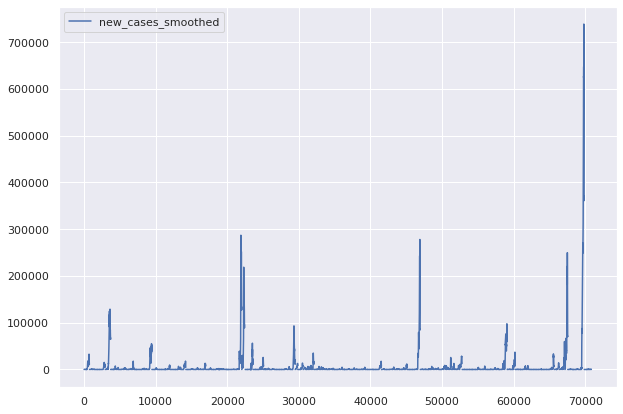

In [13]:
plt.figure(figsize=(10,7))
df.new_cases_smoothed.plot()
plt.legend()
plt.show()

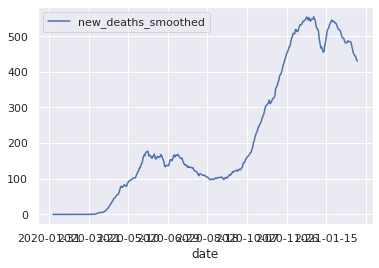

In [324]:
plt.figure()
df.new_deaths_smoothed.plot()
plt.legend()
plt.show()

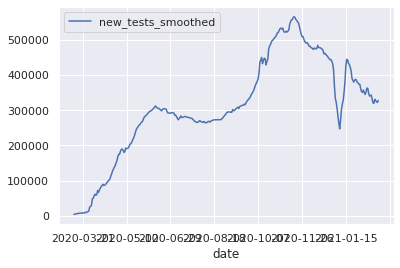

In [325]:
plt.figure()
df.new_tests_smoothed.plot()
plt.legend()
plt.show()

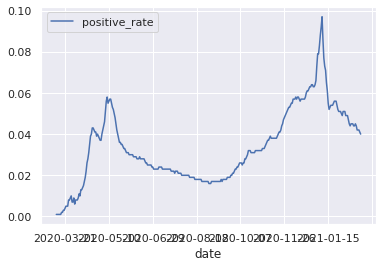

In [326]:
plt.figure()
df.positive_rate.plot()
plt.legend()
plt.show()

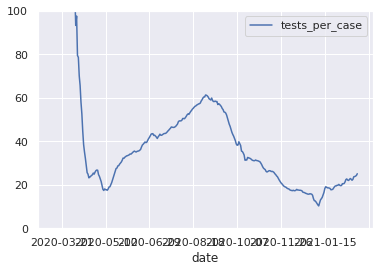

In [327]:
plt.figure()
df.tests_per_case.plot()
plt.ylim(0, 100)
plt.legend()
plt.show()

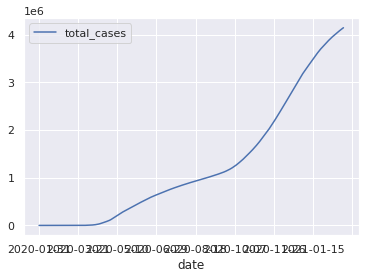

In [328]:
plt.figure()
df.total_cases.plot()
plt.legend()
plt.show()

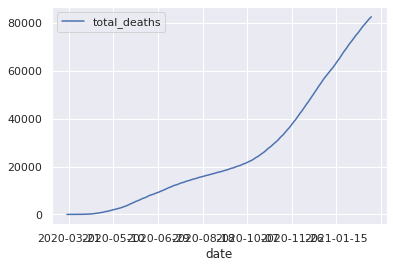

In [329]:
plt.figure()
df.total_deaths.plot()
plt.legend()
plt.show()

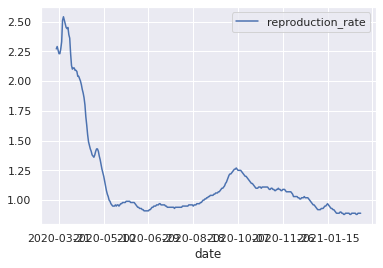

In [330]:
plt.figure()
df.reproduction_rate.plot()
plt.legend()
plt.show()

0                    1
location                                       Armenia              Armenia
date                               2020-01-31 00:00:00  2020-02-29 00:00:00
p_scores_all_ages                                -5.89                 2.26
p_scores_15_64                                     NaN                  NaN
p_scores_65_74                                     NaN                  NaN
p_scores_75_84                                     NaN                  NaN
p_scores_85plus                                    NaN                  NaN
deaths_2020_all_ages                              2567                 2434
average_deaths_2015_2019_all_ages               2727.6               2380.2
deaths_2015_all_ages                              2582                 2363
deaths_2016_all_ages                              2722                 2576
deaths_2017_all_ages                              3027                 2442
deaths_2018_all_ages                              2534                 2273
deaths_2019_all_ages                              2773                 2247
deaths_2010_all_ages                               NaN                  NaN
deaths_2011_all_ages                               NaN                  NaN
deaths_2012_all_ages                               NaN                  NaN
deaths_2013_all_ages                               NaN                  NaN
deaths_2014_all_ages                               NaN                  NaN
deaths_2021_all_ages                               NaN                  NaN
time                                                 1                    2
time_unit                                      monthly              monthly

0                    1
location                       Armenia              Armenia
date               2020-01-31 00:00:00  2020-02-29 00:00:00
p_scores_all_ages                -5.89                 2.26
time_unit                      monthly              monthly

In [308]:
# Excess mortality vs total_cases